In [17]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
import scipy.linalg as la


In [18]:
data = fitsio.read('../simulation/output/sim_v1_fine.fits')
antenna_sim_path = "../../Drive/AntennaResponse/Exported/"
antenna_fname = "feko_bnl_monopole_1m_75deg.fits"
B = lusee.LBeam(antenna_sim_path+'/'+antenna_fname)

In [20]:
mdata = data.mean(axis=0)
print(mdata.shape)

(10, 50)


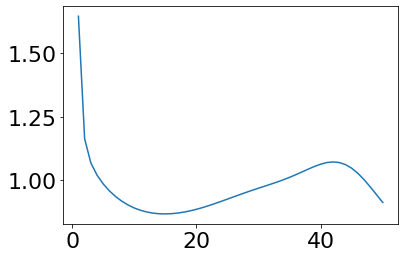

In [61]:
D = 1.5
Z0 = 377
freq=np.arange(1,51)
leff = np.sqrt(D*B.ZRe/(np.pi*Z0))*3e8/(freq*1e6)
Zant = B.ZRe+1j*B.ZIm
Gamma = 0.4
T2V = np.array(lusee.monosky.B2V(lusee.monosky.T2B(np.ones(50),freq),freq,leff,Gamma))
plt.plot(freq,leff)

Text(0, 0.5, 'inst SNR')

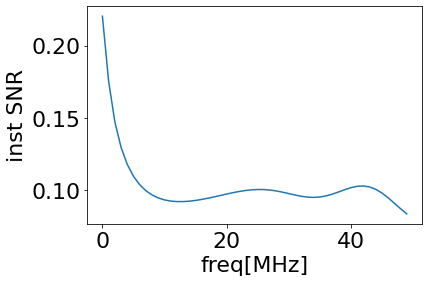

In [59]:
plt.plot(mdata[0,:]/(4e-18/T2V))
plt.xlabel('freq[MHz]')
plt.ylabel('inst SNR')

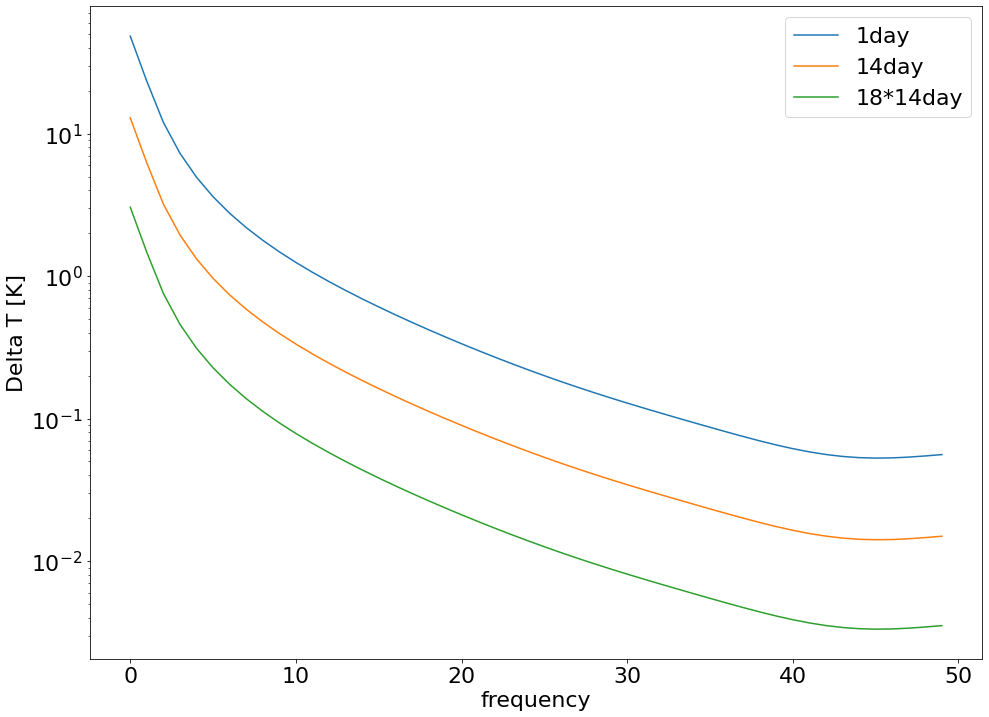

In [60]:
plt.figure(figsize=(16,12))
Ttot = mdata[0,:]+4e-18/T2V
na=np.sqrt(6)
plt.plot(Ttot/np.sqrt(1e6*3600*24)/na,label='1day')
plt.plot(Ttot/np.sqrt(14*1e6*3600*24)/na,label='14day')
plt.plot(Ttot/np.sqrt(18*14*1e6*3600*24)/na,label='18*14day')
plt.xlabel('frequency')
plt.ylabel('Delta T [K]')
plt.semilogy()
plt.legend()